In [1]:
from langchain_core.documents import Document
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from typing import List
import json
import textwrap

In [2]:
def print_docs(docs: List[Document]) -> None:
    for doc in docs:
        print(textwrap.fill(doc.page_content, 100))
        print("")
        print(json.dumps(doc.metadata, indent=4))
        print("")
        print("=" * 50)
        print("")

In [3]:
persist_directory = "./../embeddings"

Document lengths _before_ extra chunking on line breaks for long sections greater than 1500.

![img](./histogram_before_splitting_output.png)

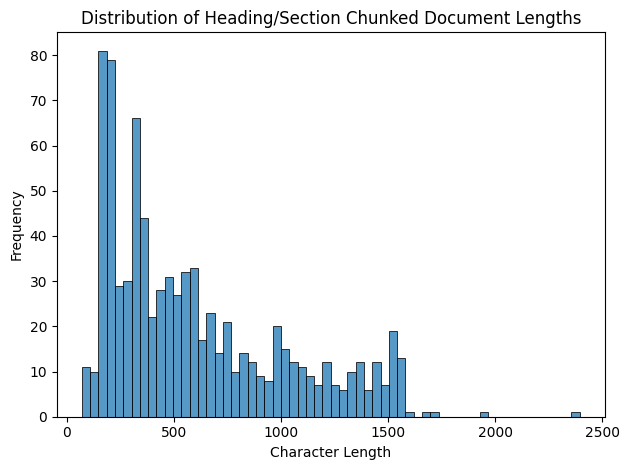

In [4]:
with open(f"{persist_directory}/documents.pickle", "rb") as handle:
    documents: List[Document] = pickle.load(handle)

data = [len(d.page_content) for d in documents]

sns.histplot(data, bins=60)

plt.title("Distribution of Heading/Section Chunked Document Lengths")
plt.xlabel("Character Length")
plt.ylabel("Frequency")

plt.tight_layout()

plt.show()

In [5]:
import math

math.sqrt(len(documents))

28.879058156387302

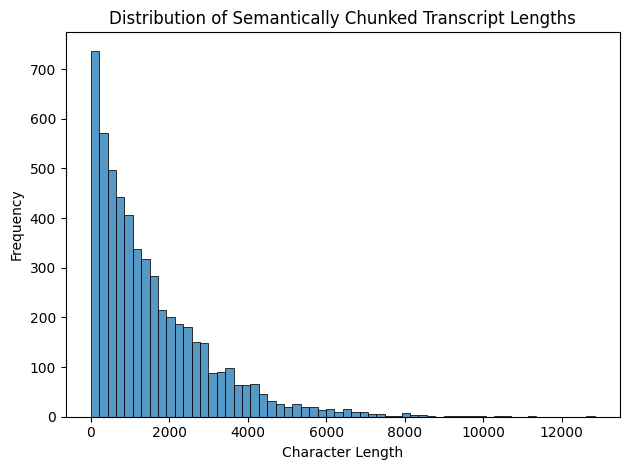

In [6]:
with open(f"{persist_directory}/transcripts.pickle", "rb") as handle:
    transcripts: List[Document] = pickle.load(handle)

data = [len(d.page_content) for d in transcripts]

sns.histplot(data, bins=60)

plt.title("Distribution of Semantically Chunked Transcript Lengths")
plt.xlabel("Character Length")
plt.ylabel("Frequency")

plt.tight_layout()

plt.show()

In [7]:
import torch

embeddings = torch.load("./../colbert_index/colbert/indexes/documents/0.residuals.pt")

embeddings.shape

torch.Size([86636, 128])